## 1. Chargement et exploration des données

In [1]:
import pandas as pd

#Création des données
data = {
    "jour": ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche",
             "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"],
    "produit": ["Riz", "Riz", "Riz", "Riz", "Riz", "Riz", "Riz",
                "Huile", "Huile", "Huile", "Huile", "Huile", "Huile", "Huile"],
    "quantite": [10, 12, None, 20, 15, 25, 30,
                 5, 7, 8, "dix", 10, 12, None],
    "prix_unitaire": [500, 500, 500, 500, 500, 500, 500,
                      1000, 1000, 1000, 1000, 1000, None, 1000]
}

#Chargement de nos données dans un dataframe
df = pd.DataFrame(data)
df

,jour,produit,quantite,prix_unitaire
0,Lundi,Riz,10,500.0
1,Mardi,Riz,12,500.0
2,Mercredi,Riz,None,500.0
3,Jeudi,Riz,20,500.0
4,Vendredi,Riz,15,500.0
5,Samedi,Riz,25,500.0
6,Dimanche,Riz,30,500.0
7,Lundi,Huile,5,1000.0
8,Mardi,Huile,7,1000.0
9,Mercredi,Huile,8,1000.0


## 2. Nettoyage des données

In [3]:
#Nettoyage des données afin que les valeurs non numériques soient remplacées par Nan 'Not an Number'
df["quantite"] = pd.to_numeric(df["quantite"], errors="coerce")
df["prix_unitaire"] = pd.to_numeric(df["prix_unitaire"], errors="coerce")
df

,jour,produit,quantite,prix_unitaire
0,Lundi,Riz,10.0,500.0
1,Mardi,Riz,12.0,500.0
2,Mercredi,Riz,NaN,500.0
3,Jeudi,Riz,20.0,500.0
4,Vendredi,Riz,15.0,500.0
5,Samedi,Riz,25.0,500.0
6,Dimanche,Riz,30.0,500.0
7,Lundi,Huile,5.0,1000.0
8,Mardi,Huile,7.0,1000.0
9,Mercredi,Huile,8.0,1000.0


In [4]:
#Suppression des lignes contenant les valeurs 'Nan'
df_clean = df.dropna()
df_clean

,jour,produit,quantite,prix_unitaire
0,Lundi,Riz,10.0,500.0
1,Mardi,Riz,12.0,500.0
3,Jeudi,Riz,20.0,500.0
4,Vendredi,Riz,15.0,500.0
5,Samedi,Riz,25.0,500.0
6,Dimanche,Riz,30.0,500.0
7,Lundi,Huile,5.0,1000.0
8,Mardi,Huile,7.0,1000.0
9,Mercredi,Huile,8.0,1000.0
11,Vendredi,Huile,10.0,1000.0


## 3. Analyse du chiffre d'affaires

In [6]:
#Création d'une colonne "chiffre_affaires"
df_clean["chiffre_affaires"] = df_clean["quantite"] * df_clean["prix_unitaire"]
df_clean

C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\2131612315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["chiffre_affaires"] = df_clean["quantite"] * df_clean["prix_unitaire"]


,jour,produit,quantite,prix_unitaire,chiffre_affaires
0,Lundi,Riz,10.0,500.0,5000.0
1,Mardi,Riz,12.0,500.0,6000.0
3,Jeudi,Riz,20.0,500.0,10000.0
4,Vendredi,Riz,15.0,500.0,7500.0
5,Samedi,Riz,25.0,500.0,12500.0
6,Dimanche,Riz,30.0,500.0,15000.0
7,Lundi,Huile,5.0,1000.0,5000.0
8,Mardi,Huile,7.0,1000.0,7000.0
9,Mercredi,Huile,8.0,1000.0,8000.0
11,Vendredi,Huile,10.0,1000.0,10000.0


In [7]:
#Calcul du chiffre d'affaires par produit
ca_par_produit = df_clean.groupby("produit")["chiffre_affaires"].sum()
ca_par_produit

produit
Huile    30000.0
Riz      56000.0
Name: chiffre_affaires, dtype: float64

In [8]:
#Calcul du nombre de ventes par jour
ventes_par_jour = df_clean.groupby("jour")["quantite"].sum()
#Détermination du jour ayant le plus de ventes
meilleur_jour = ventes_par_jour.idxmax()
meilleur_jour

'Dimanche'

In [9]:
#Calcul du pourcentage de chiffre d'affaires par produit
parts_ca = (ca_par_produit / ca_par_produit.sum()) * 100
parts_ca

produit
Huile    34.883721
Riz      65.116279
Name: chiffre_affaires, dtype: float64

## 4. Visualisations

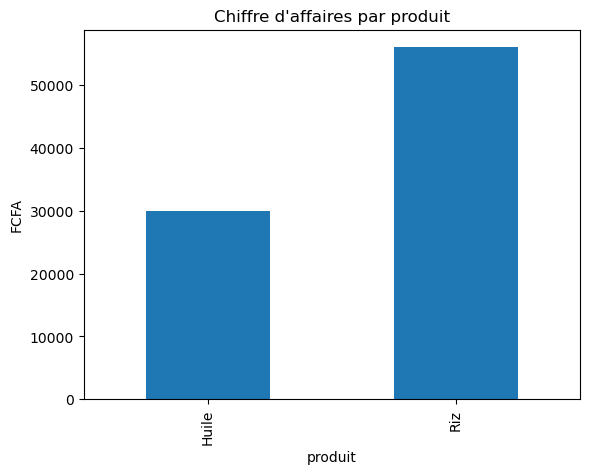

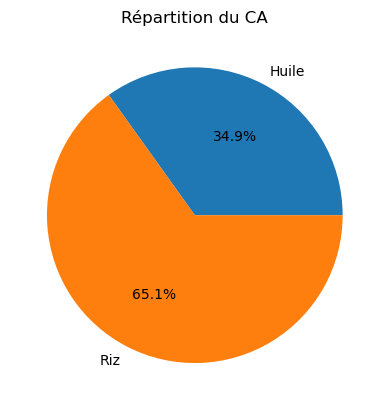

In [18]:
import matplotlib.pyplot as plt

#Création d'un diagramme à barres représentant le chiffre d'affaires par produit
ca_par_produit.plot(kind="bar", title="Chiffre d'affaires par produit")
plt.ylabel("FCFA")

#Sauvegarde du diagramme à barres sous forme d'images
plt.savefig("analyse_ventes_data_analyst/visuals/ca_par_produit.png", bbox_inches="tight")

#Affichage du diagramme à barres
plt.show()

#Création d'un diagramme circulaire représentant la répartition du chiffre d'affaires par produit
parts_ca.plot(kind="pie", autopct="%1.1f%%", title="Répartition du CA")
plt.ylabel("")

#Sauvegarde du diagramme à barres sous forme d'images
plt.savefig("analyse_ventes_data_analyst/visuals/parts_ca.png", bbox_inches="tight")

#Affichage du diagramme à barres
plt.show()

## 5. Conclusions business